# Brief Description

The purpose of this project is to conduct a regression analysis using machine learning, to predict medical cost of individuals based on certain criteria. These criteria are, if the individual is a smoker or not, has children, what their body mass index is, and where they are from. The train split train split will be utilised for the purpose of training our model and see how well it can fair in predicting.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from math import sqrt
%matplotlib inline
sns.set()
sns.set_style('white')
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})

In [2]:
#importing csv file
df_insurance = pd.read_csv('insurance.csv')
df_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
#checking the data types
df_insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
#checking in there any null values in the data set
df_insurance.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

The data looks fairly clean as there are no null values and data is structured

# Summary Statistics and EDA

In [5]:
#Summary Statistics
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


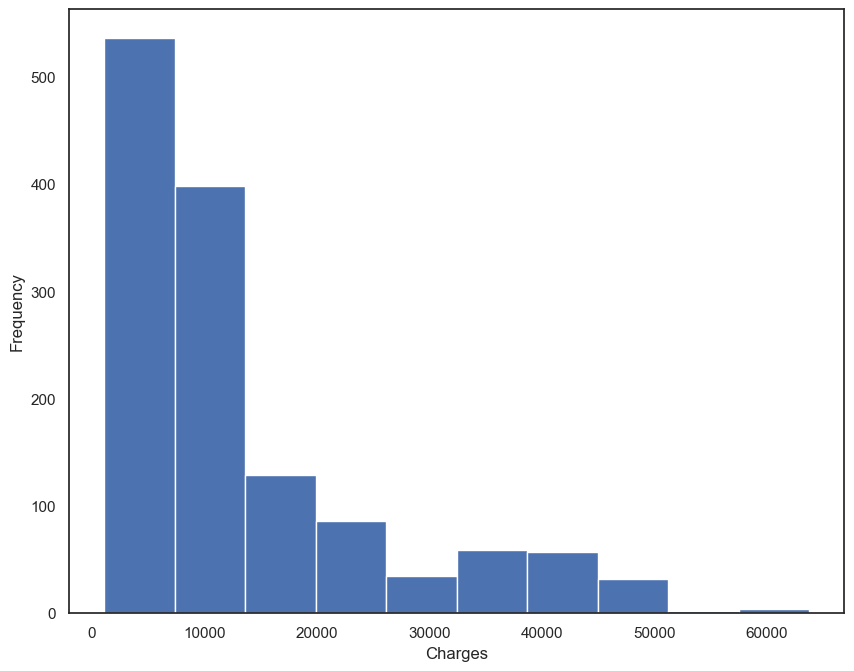

In [6]:
plt.hist(x=df_insurance['charges'])
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

(array([ 46., 105., 101., 155., 198., 283., 156., 123., 115.,  56.]),
 array([ 7.02275569,  7.42678461,  7.83081352,  8.23484244,  8.63887136,
         9.04290027,  9.44692919,  9.8509581 , 10.25498702, 10.65901594,
        11.06304485]),
 <BarContainer object of 10 artists>)

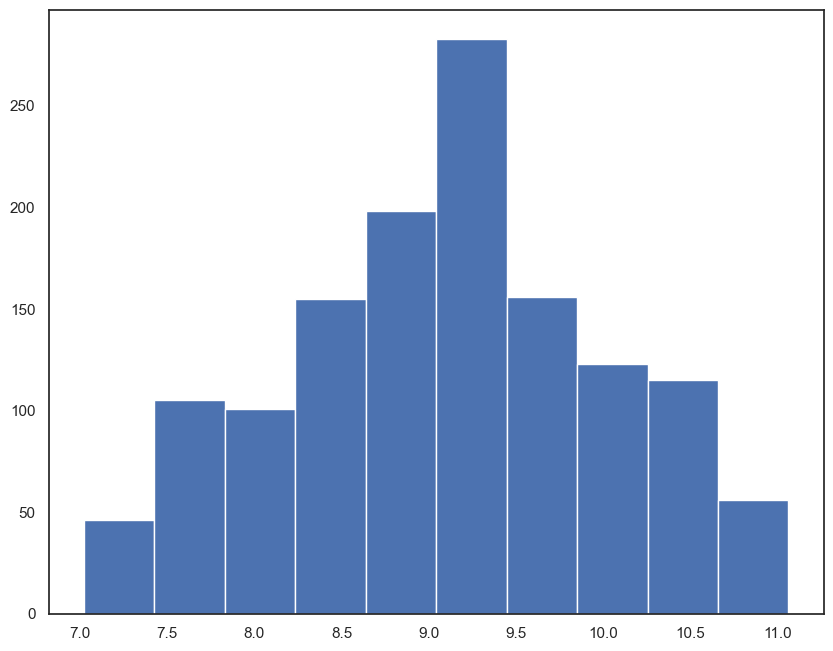

In [7]:
#creating a normally distributed column of charges
df_insurance['charges norm dist'] = np.log(df_insurance['charges'])

plt.hist(df_insurance['charges norm dist'])

In [8]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges,charges norm dist
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,8.260197


<AxesSubplot:xlabel='sex', ylabel='count'>

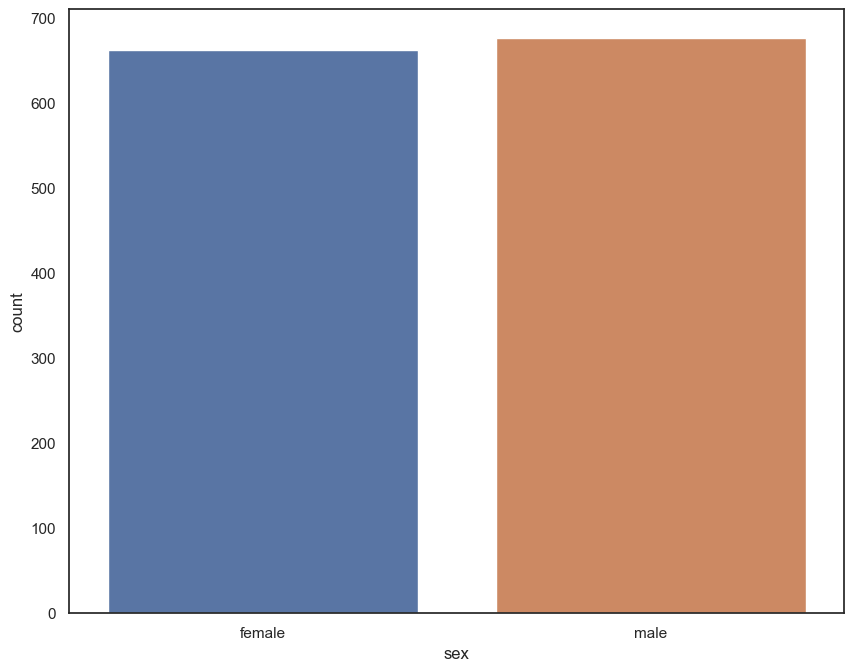

In [9]:
#Visualising the number of male and female clients
sns.countplot(x = 'sex', 
              data = df_insurance)

The number of male and females is about even

<AxesSubplot:xlabel='smoker', ylabel='count'>

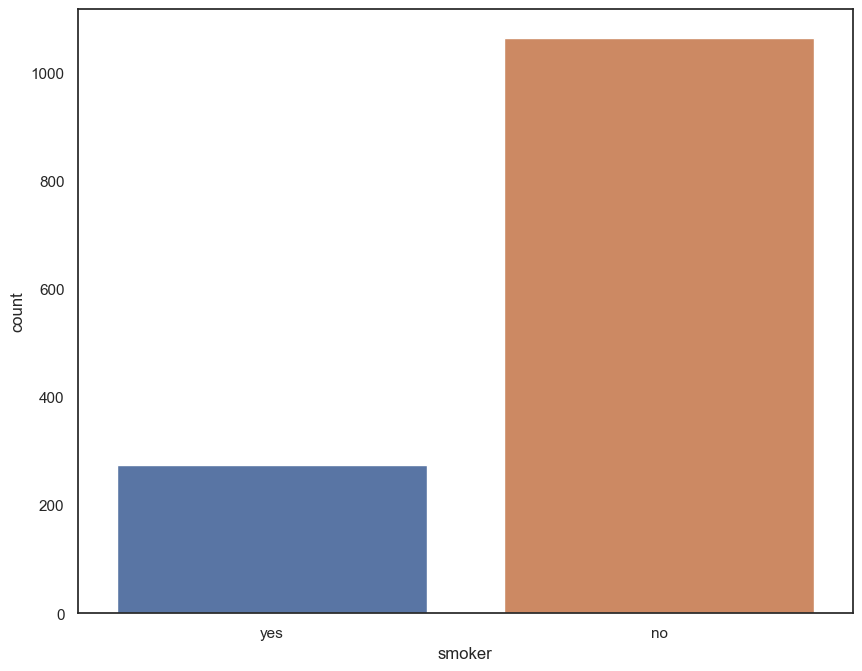

In [10]:
#Visualising smokers and non-smokers
sns.countplot(x = 'smoker', 
              data = df_insurance)

Non-smokers out number the smokers by more than 50%

<AxesSubplot:xlabel='region', ylabel='count'>

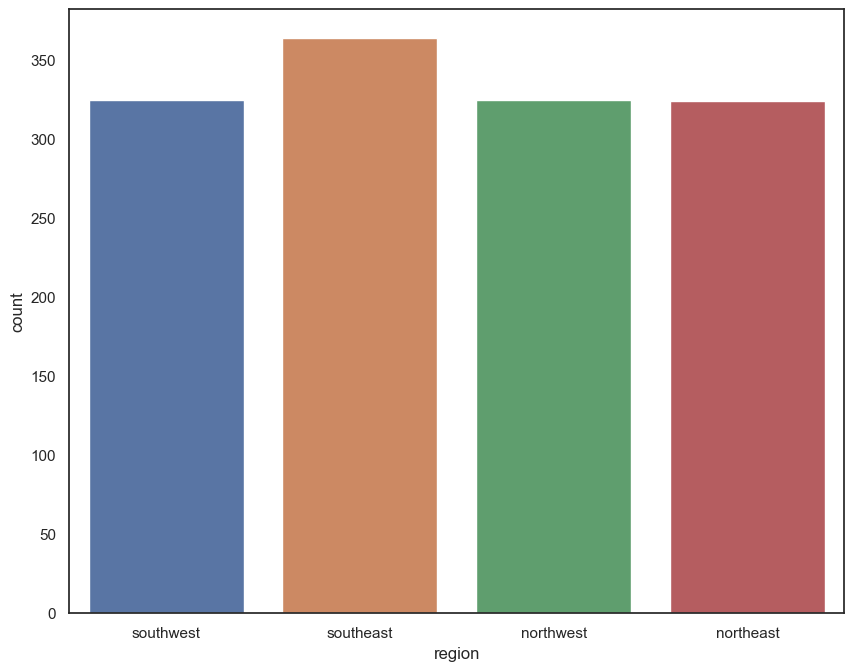

In [11]:
#Visualising the different regions the clients are from 
sns.countplot(x = 'region', 
              data = df_insurance)

# Converting the Categorial variables into dummy variables


In [12]:
#The get_dummies function in pandas will easily convert the columns have categorial values into seperate columns with numeric values
df_insurance2 = pd.get_dummies(df_insurance, 
                               drop_first=True) #drop_first to avoid multicollinearity
df_insurance2.head()

,age,bmi,children,charges,charges norm dist,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,9.734176,0,1,0,0,1
1,18,33.770,1,1725.55230,7.453302,1,0,0,1,0
2,28,33.000,3,4449.46200,8.400538,1,0,0,1,0
3,33,22.705,0,21984.47061,9.998092,1,0,1,0,0
4,32,28.880,0,3866.85520,8.260197,1,0,1,0,0


# Splitting model into train and test

In [13]:
x = df_insurance2.drop(['charges', 
                        'charges norm dist'], 
                       axis = 1)

y = df_insurance2['charges norm dist']

<AxesSubplot:>

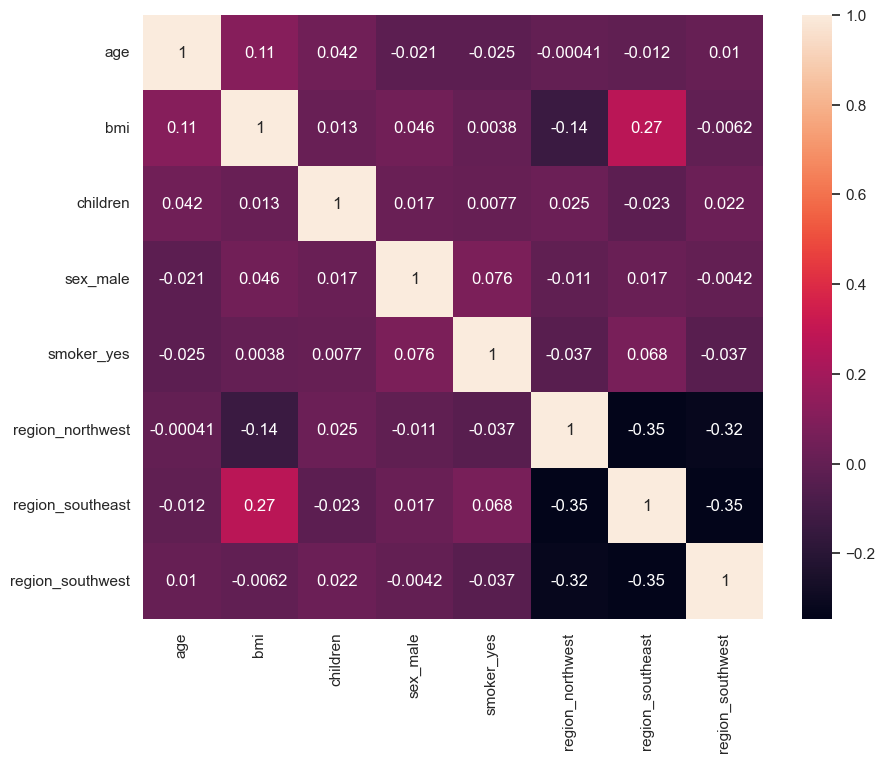

In [14]:
#correlation heatmap of the independent variables
sns.heatmap(x.corr(), annot = True)

<AxesSubplot:>

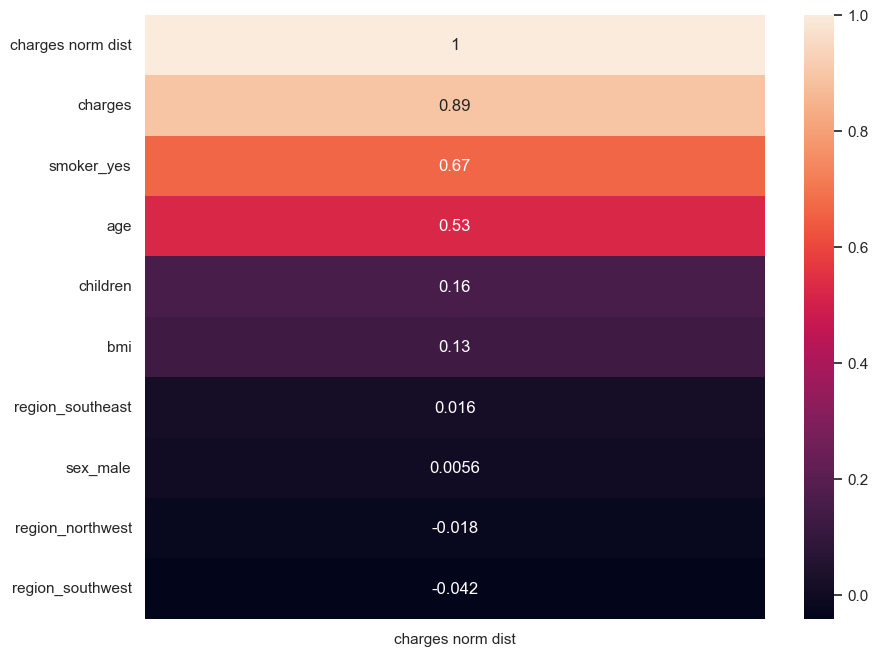

In [15]:
#correlation heatmap of the dependent variable and the dependent variables
sns.heatmap(df_insurance2.corr()[['charges norm dist']].sort_values(by='charges norm dist', 
                                                                    ascending=False), 
                                                                    annot = True)

In [16]:
#Converting the variables to numpy arrays and splitting the data into train and test 
x_np = x.to_numpy()
y_np = y.to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x_np, y_np, test_size = 0.25, random_state = 20)

# Interpreting the model

In [17]:
model = LinearRegression().fit(x_train, y_train)

In [18]:
model.intercept_

7.073769900493725

In [19]:
#The Beta coefficients
model.coef_

array([ 0.0340428 ,  0.01231701,  0.10607751, -0.05955154,  1.55559695,
       -0.07022795, -0.13003284, -0.12222521])

In [20]:
#creating a dataframe to easily view the beta coefficients
coeff_df = pd.DataFrame(model.coef_, 
                        x.columns, 
                        columns=['Coefficient'])
coeff_df

,Coefficient
age,0.034043
bmi,0.012317
children,0.106078
sex_male,-0.059552
smoker_yes,1.555597
region_northwest,-0.070228
region_southeast,-0.130033
region_southwest,-0.122225


In [21]:
#Calculation the inverse of the logarithmic fuction for easier interpretation
coeff_df2 = pd.DataFrame(np.exp(coeff_df['Coefficient']))
coeff_df2

,Coefficient
age,1.034629
bmi,1.012393
children,1.111908
sex_male,0.942187
smoker_yes,4.737914
region_northwest,0.932181
region_southeast,0.878067
region_southwest,0.884949


The two most important coefficients are smoker_no and smoker_yes

smoker_yes - (4.737914-1)*100 = 373.79% -> This means that, if an individual is a smoker then their medical chargers are predicted to increase by 373.79%.

THE OTHER COEFFICIENTS
age - (1.034629-1)*100 = 3.46% -> The older an individual is then their medical charges are predicted to increase by 3.46%.

bmi - (1.012393-1)*100 = 1.24% -> The higher an individuals body mass index(bmi) then charges are predicted to increase by 1.24%.

children - (1.111908-1)*100 = 11.19% -> The more children an individual has then the medical charges are predicted to increase by 11.19%.

sex_male - (0.942187-1)*100 = -5.78% -> If the individual is a male then the medical charges are predicted to decrease by 5.78%

region_northwest - (0.932181-1)*100 = -6.78% -> If the individual is from the northwest region then the medical charges are predicted to decrease by 6.78%

region_southeast - (0.878067-1)*100 = -12.19%  ->  If the individual is from the northwest region then the medical charges are predicted to decrease by 12.19%

region_southwest - (0.884949-1)*100 = -11.51% -> If the individual is from the northwest region then the medical charges are predicted to decrease by 11.51%











In [22]:
y_pred = model.predict(x_test)
y_pred_2 = model.predict(x_train)

In [23]:
#training set mse
mse2 = mean_squared_error(y_train, y_pred_2)
mse2

0.20473488578233034

In [24]:
#testing set mse 
mse = mean_squared_error(y_test, y_pred)
mse

0.17175561858874

The mean squared error for both the training and testing set are relatively low which are 20.47% and 17.18% respectively

In [25]:
#testing set R^2
model.score(x_train, y_train)

0.7543647002051515

In [26]:
#training set R^2
model.score(x_test, y_test)

0.8044496172796265

Both the R^2 of the testing and training set are reasonable measures of variability for the target variable of 75.44% and 80.44% respectivity. However the model can be considered to be underfitted.  

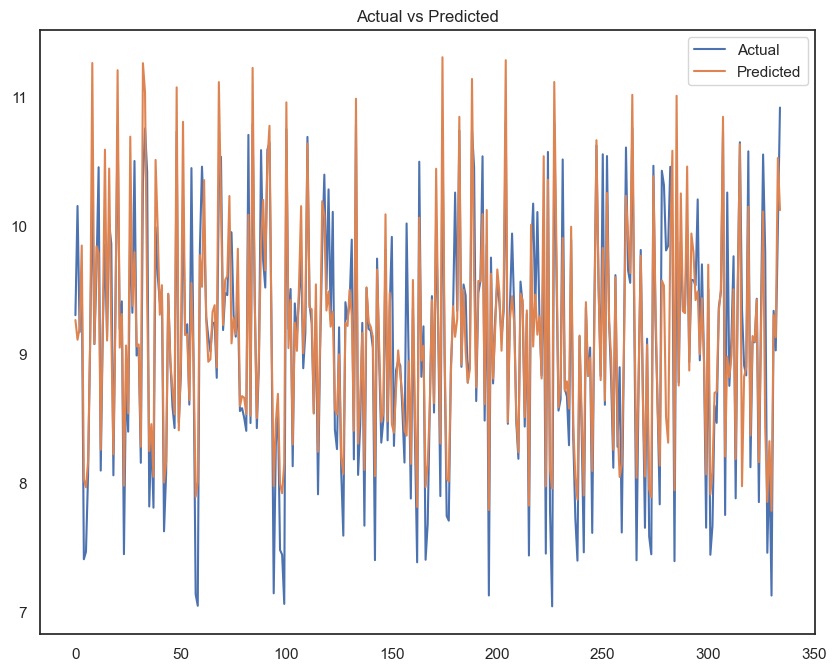

In [27]:
#Visual representation actual and predicted values
labels = ['Actual', 'Predicted']
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(labels)
plt.title('Actual vs Predicted')
plt.show()